# Parcial 2, Mineria de Datos
## Juan Sebastián Ruiz Caro

El objetivo de este trabajo es modelar el comportamiento de la variable 'activities', que describe si el estudiante tiene actividades extracurriculares en caso de ser $1$ y $0$ en caso contrario, esto, por medio de un modelo de regresión logistico.

In [123]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import altair as alt
from vega_datasets import data
import csv
from itertools import combinations
from  scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy.lib.arraysetops import setxor1d
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [124]:
pd.set_option('display.max_columns', None)
!pip install -U -q PyDrive

In [125]:
pip install pingouin

In [126]:
import pingouin as pg

In [131]:
Data = pd.read_csv('/content/drive/MyDrive/2022-2/Mineria de datos/parcial/student-por.csv',
                   sep = ";")

# verificación de calidad de datos y limpieza 

In [132]:
Data.head(4)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14


Dimensión de los datos

In [133]:
n = Data.shape[0]
print('Rendimiento Portugues')
print('Individuos:', n)
print('Variables:', Data.shape[1])

Rendimiento Portugues
Individuos: 649
Variables: 33


La base de datos suministrada cuenta con $33$ variables y $649$ individuos.

Atributos y tipos de atributos

In [134]:
Data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

## Análisis de datos faltantes

En la variable de interes, 'Activities', que toma el valor de $1$ si el estudiante toma clases extra-curriculares y $0$ en caso constrario, se tiene la información cumpleta.

In [136]:
DF = pd.DataFrame()
DF['Variable'] = list(Data.columns)
DF['datos faltantes'] = list(Data.isnull().sum())
DF['% de datos faltantes'] =  list(100 * round(Data.isnull().sum() / n, 3)) ; DF

,Variable,datos faltantes,% de datos faltantes
0,school,0,0.0
1,sex,2,0.3
2,age,0,0.0
3,address,0,0.0
4,famsize,2,0.3
5,Pstatus,2,0.3
6,Medu,0,0.0
7,Fedu,0,0.0
8,Mjob,0,0.0
9,Fjob,1,0.2


De las $33$ variables con las que cuenta la base de datos, solamente $8$ tienen la información imcompleta, ademas, como maximo se tienen dos datos faltantes por variable, por lo tanto, al ser tan pocas estan observaciones faltantes, se realizara un proceso de imputación simple, dado que todas las variables son cualitativas, cada una de ellas se imputara con la moda.  

## Imputación de datos faltantes

## Variables cualitativas

### Sexo

In [137]:
Data['sex'].value_counts()
Data['sex'][Data['sex'].isna()] = ['F', 'F']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Tamaño de la familia

In [138]:
Data['famsize'].value_counts()
Data['famsize'][Data['famsize'].isna()] = ['GT3', 'GT3']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Estado de convicencia de los padres

In [139]:
Data['Pstatus'].value_counts()
Data['Pstatus'][Data['Pstatus'].isna()] = ['T', 'T']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Trabajo del padre

In [140]:
Data['Fjob'].value_counts()
Data['Fjob'][Data['Fjob'].isna()] = 'other'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Tutor del estudiante

In [141]:
Data['guardian'].value_counts()
Data['guardian'][Data['guardian'].isna()] = ['mother', 'mother']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Apoyo educativo familiar

In [142]:
Data['famsup'].value_counts()
Data['famsup'][Data['famsup'].isna()] = ['yes', 'yes']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### asistió a la escuela de párvulos

In [143]:
Data['nursery'].value_counts()
Data['nursery'][Data['nursery'].isna()] = 'yes'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### ¿Quiere cursar estudios superiores?

In [144]:
Data['higher'].value_counts()
Data['higher'][Data['higher'].isna()] = 'yes'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [145]:
sum(Data.isna().sum() == 0)

33

In [146]:
Data['paid'].value_counts()

no     608
yes     39
No       2
Name: paid, dtype: int64

## Datos duplicados

In [147]:
Data.duplicated().sum()

0

In [148]:
Data['paid'].value_counts()

no     608
yes     39
No       2
Name: paid, dtype: int64

No se tiene información duplicada.

## Consistencia de datos

In [149]:
Cualitativas = ['school', 'traveltime', 'studytime', 'failures',  'sex',  'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet','romantic','famrel','freetime', 'goout', 'Dalc', 'Walc', 'health']

In [150]:
Cuantitativas = ['age','absences', 'G1', 'G2', 'G3']

### Variables cuantitativas

In [151]:
Data.loc[:, Cuantitativas].describe()

,age,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,3.659476,11.414484,11.570108,11.952234
std,1.218138,4.640759,2.793153,2.913639,3.358130
min,15.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,32.000000,25.000000,19.000000,36.000000


In [152]:
(Data['G3'] > 20).sum()

1

In [153]:
Data[(Data['G3'] > 20)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
155,GP,M,17,U,GT3,T,2,1,other,other,home,mother,1,1,0,no,yes,no,no,yes,yes,yes,no,5,4,5,1,2,5,22,9,7,36


In [154]:
(Data['G1'] > 20).sum()

1

In [155]:
Data[(Data['G1'] > 20)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
623,MS,M,18,U,LE3,T,4,4,teacher,services,other,mother,2,3,0,no,no,no,no,yes,yes,yes,yes,4,2,2,2,2,5,0,25,16,16


No pueden existir notas por fuera del intervalo $[0,20]$, sin embargo, posiblemente por un error de digitación se encontro que existen dos individuos que tienen una nota superior a $20$. Por lo tanto, se borran estos dos individuos de la base de datos.

In [156]:
Data = Data.drop([155, 623])

In [157]:
n = Data.shape[0]

In [158]:
print('Rendimiento Portugues')
print('Individuos:', n)
print('Variables:', Data.shape[1])

Rendimiento Portugues
Individuos: 647
Variables: 33


### Variables cualitativas

Dado que algunas variable cualitativas se encuentran errores de digitación, como, por ejemplo, escribir una misma modalidad con y sin mayuscula, se corrigue este problema reescribiendo las modalidades en caso de ser necesario.

In [159]:
len(Cualitativas)

28

In [160]:
for i in range(28):
  print(Data[Cualitativas[i]].value_counts())

GP    422
MS    225
Name: school, dtype: int64
1    365
2    212
3     54
4     16
Name: traveltime, dtype: int64
2    305
1    211
3     96
4     35
Name: studytime, dtype: int64
0    547
1     70
2     16
3     14
Name: failures, dtype: int64
F    384
M    263
Name: sex, dtype: int64
U    450
R    197
Name: address, dtype: int64
GT3    456
LE3    191
Name: famsize, dtype: int64
T    567
A     79
B      1
Name: Pstatus, dtype: int64
2    185
4    174
1    143
3    139
0      6
Name: Medu, dtype: int64
2    209
1    173
3    131
4    127
0      7
Name: Fedu, dtype: int64
other       257
services    136
at_home     135
teacher      71
health       48
Name: Mjob, dtype: int64
other       367
services    179
at_home      42
teacher      36
health       23
Name: Fjob, dtype: int64
course        285
home          148
reputation    143
other          71
Name: reason, dtype: int64
mother    454
father    153
other      40
Name: guardian, dtype: int64
no     578
yes     67
Yes      1
No       

In [161]:
Data['Pstatus'].value_counts()
Data[Data['Pstatus'] == 'B']
Data = Data.drop(67)
Data['schoolsup'].value_counts()
Data['schoolsup'][Data['schoolsup'] == 'Yes'] = 'yes'
Data['schoolsup'][Data['schoolsup'] == 'No'] = 'no'
Data['schoolsup'].value_counts()
Data['paid'].value_counts()
Data['paid'][Data['paid'] == 'No'] = 'no'
Data['paid'].value_counts()
Data['activities'].value_counts()
Data['activities'][Data['activities'] == 'No'] = 'no'
Data['activities'][Data['activities'] == 'Yes'] = 'yes'
Data['activities'].value_counts()
Data['nursery'].value_counts()
Data['nursery'][Data['nursery'] == 'No'] = 'no'
Data['nursery'].value_counts()
Data['internet'].value_counts()
Data['internet'][Data['internet'] == 'Yes'] = 'yes'
Data['romantic'].value_counts()
Data['romantic'][Data['romantic'] == 'No'] = 'no'
Data['romantic'].value_counts

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithC

<bound method IndexOpsMixin.value_counts of 0       no
1       no
2       no
3      yes
4       no
      ... 
644     no
645     no
646     no
647     no
648     no
Name: romantic, Length: 646, dtype: object>

In [162]:
# Verificación:

for i in range(28):
  print(Data[Cualitativas[i]].value_counts())

GP    421
MS    225
Name: school, dtype: int64
1    364
2    212
3     54
4     16
Name: traveltime, dtype: int64
2    305
1    211
3     96
4     34
Name: studytime, dtype: int64
0    546
1     70
2     16
3     14
Name: failures, dtype: int64
F    383
M    263
Name: sex, dtype: int64
U    449
R    197
Name: address, dtype: int64
GT3    455
LE3    191
Name: famsize, dtype: int64
T    567
A     79
Name: Pstatus, dtype: int64
2    185
4    174
1    143
3    138
0      6
Name: Medu, dtype: int64
2    209
1    172
3    131
4    127
0      7
Name: Fedu, dtype: int64
other       257
at_home     135
services    135
teacher      71
health       48
Name: Mjob, dtype: int64
other       366
services    179
at_home      42
teacher      36
health       23
Name: Fjob, dtype: int64
course        284
home          148
reputation    143
other          71
Name: reason, dtype: int64
mother    453
father    153
other      40
Name: guardian, dtype: int64
no     579
yes     67
Name: schoolsup, dtype: int64

En el proceso de verificación de la calidad de datos y limpieza, se encontro que la base cuenta con muy pocos datos faltantes, unicamente en variable cualitativas los cuales fueron imputados por medio de la moda. Se eliminaron aquellas filas en las cuales habian errores de digitación incorregibles, como por ejemplo, notas con un puntaje mayor a $20$ y variables en las cuales existian modalidades no validas (Como ocurrio en la variable Psatus), por otra parte, en cuanto a los errores de digitación por mayusculas se realizaron las correciones respectivas.

# Análisis exploratorio de Datos


El 51.238% de los estudiantes de la muestra no tiene actividades extracurriculares, en contra parte, únicamente el 48.762% de los estudiantes si tienen este tipo de actividades

In [163]:
SS = Data['activities'].value_counts()
SS.prop = SS/SS.sum() 

In [164]:
print(SS) ; print(round(100 * SS.prop, 3))

no     331
yes    315
Name: activities, dtype: int64
no     51.238
yes    48.762
Name: activities, dtype: float64


<BarContainer object of 2 artists>

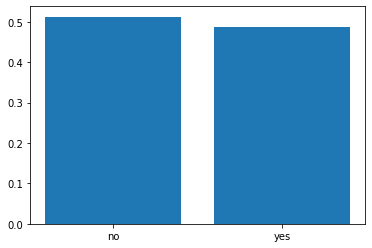

In [165]:
plt.bar(SS.index, SS.values/SS.values.sum())

## Variables cualitativas

Con la finalidad de examinar las relaciones que existen entre la variable cualitativa de interes 'activities' y las demas variables cualitativas, se procede a, por medio de la prueba Chi-cuadrado, contrastar para los pares de variables la siguiente hipótesis:

$$
\left\{
\begin{array}{ll}
H_{0}: &  Las \thinspace \thinspace variables \thinspace \thinspace son \thinspace \thinspace independientes\\
H_{1}: & Las \thinspace \thinspace variables \thinspace \thinspace no \thinspace \thinspace son \thinspace \thinspace independientes
\end{array}
\right.
$$

Con la cual, se busca concluir si las variables tienen algún tipo de relación, o por lo contrario, son independientes, cada uno de estos contrastes se realiza a un nivel de significancia del $1$%


In [166]:
var_exp = ['schoolsup','school','traveltime','studytime', 'failures','sex','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason',
 'guardian','famsup','paid','nursery','higher','internet','romantic','famrel','freetime','goout','Dalc',
 'Walc','health']
p_valores = []

In [167]:
for i in range(27):
  Conjunta = pd.crosstab(Data[var_exp[i]], Data['activities'])
  kf = chi2_contingency(Conjunta)
  p_valores.append(round(kf[1], 5))

In [168]:
Prueba = pd.DataFrame()
Prueba['variable'] = var_exp
Prueba['p - valor'] = p_valores

In [169]:
Prueba['variable'][Prueba['p - valor']< 0.05]

1       school
5          sex
8      Pstatus
9         Medu
11        Mjob
13      reason
19    internet
22    freetime
Name: variable, dtype: object

Las variables cualitativas que tienen algún tipo de asosiación con la variable de actividades extracurriculares es el colegio, el sexo, si los padren convives, educación de la madre, trabajo de la madre, razon para elegir la escuela, si tiene internet en la casa y el tiempo libre despues de la escuela.

## Variables cuantitativas
Las variables cuantitativas en estudio tienen en general asociaciones bajas entre si, excepto por las variables de las notas de los tres periodos, entre estas tres variable existe una correlación alta para los diferentes pares de variables. Esta asociación es positiva, es decir, por ejemplo, para las notas del corte 1 y 2, cuando aumenta la nota de un periodo, aumenta la del otro. Ademas, por medio del grafico de dispersión, podemos observar que estas relaciones son lineales.



In [170]:
Data.loc[:,Cuantitativas].corr()

,age,absences,G1,G2,G3
age,1.000000,0.151379,-0.177184,-0.110460,-0.109054
absences,0.151379,1.000000,-0.143016,-0.116415,-0.080784
G1,-0.177184,-0.143016,1.000000,0.864631,0.826020
G2,-0.110460,-0.116415,0.864631,1.000000,0.918029
G3,-0.109054,-0.080784,0.826020,0.918029,1.000000


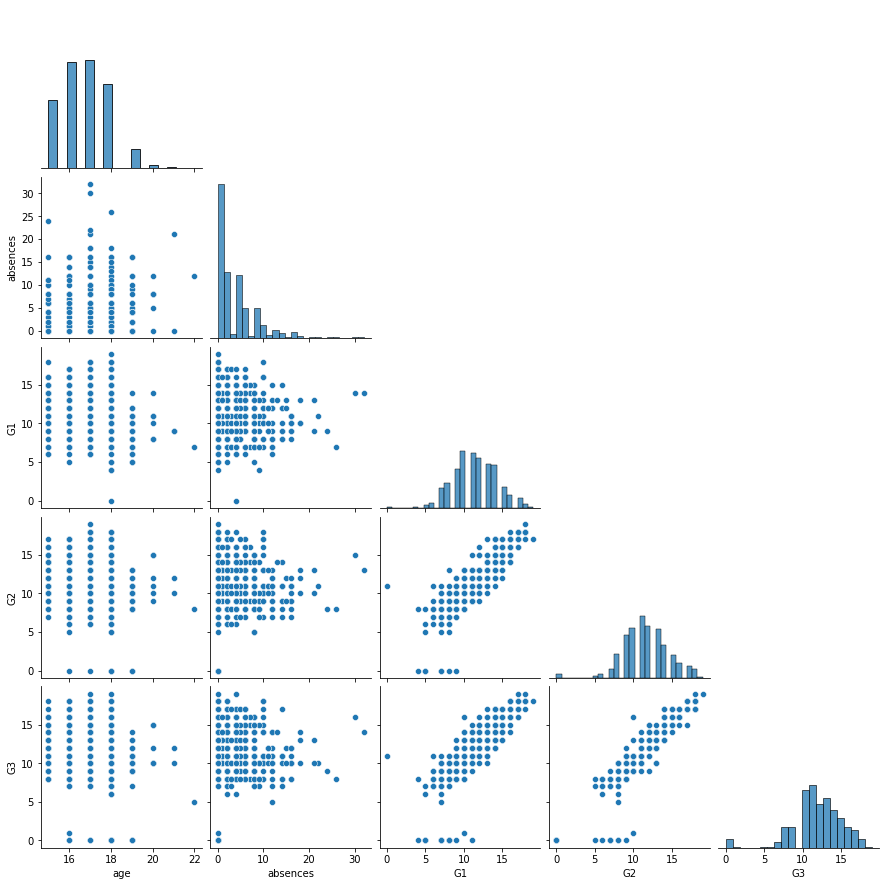

In [171]:
sns.pairplot(Data.loc[:,Cuantitativas], diag_kind = 'hist', corner = True)

Para analizar las asociaciones de lass variables cuantitativos con el apoyo eduacativo adicional se procede a realizar el grafico de Box-Plot para observar como varia el comportamiento es estas variables númericas apartir de las dos modalidades que toma la variable 'schoolsup', posteriormente se realiza una prueba $ANOVA$ para constrastar que, en caso de que hallan diferencias en media, sean significativas, por lo tanto, se desea juzgar el siguiente sistema de hipotesis:

$$
\left\{
\begin{array}{ll}
H_{0}: &  \mu_1 = \mu_2 =\ldots=\mu_a \\
H_{1}: & \mu_i \neq \mu_j \thinspace \thinspace \forall_{i \neq j}
\end{array}
\right.
$$

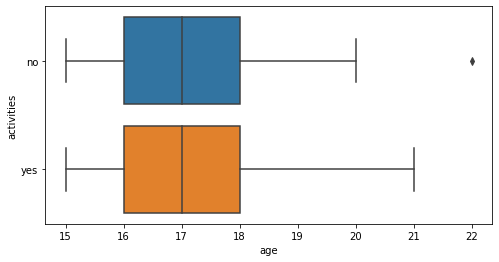

In [172]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x = 'age', y= 'activities', data = Data, ax=ax)

In [173]:
pg.anova(data = Data, dv = 'age', between = 'activities', detailed = True )

,Source,SS,DF,MS,F,p-unc,np2
0,activities,2.746847,1,2.746847,1.849232,0.174349,0.002863
1,Within,956.596806,644,1.485399,NaN,NaN,NaN


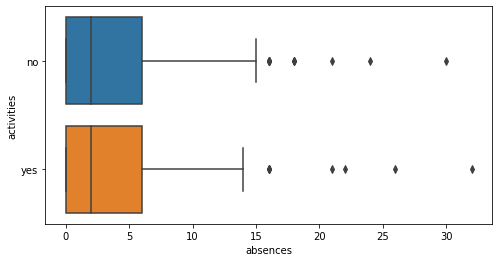

In [174]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x = 'absences', y= 'activities', data = Data, ax=ax)

In [175]:
pg.anova(data = Data, dv = 'absences', between = 'activities', detailed = True )

,Source,SS,DF,MS,F,p-unc,np2
0,activities,1.867358,1,1.867358,0.088486,0.766206,0.000137
1,Within,13590.530475,644,21.103308,NaN,NaN,NaN


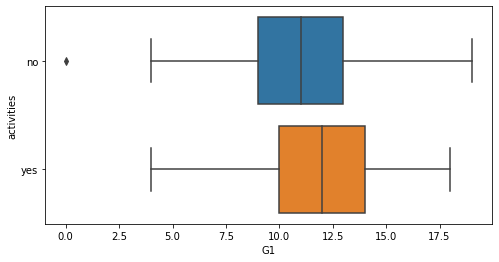

In [176]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x = 'G1', y= 'activities', data = Data, ax=ax)

In [177]:
pg.anova(data = Data, dv = 'G1', between = 'activities', detailed = True )

,Source,SS,DF,MS,F,p-unc,np2
0,activities,31.404619,1,31.404619,4.185935,0.041166,0.006458
1,Within,4831.555134,644,7.502415,NaN,NaN,NaN


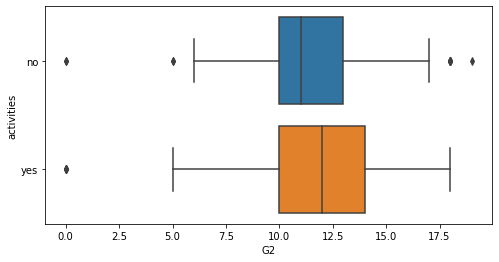

In [178]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x = 'G2', y= 'activities', data = Data, ax=ax)

In [179]:
pg.anova(data = Data, dv = 'G2', between = 'activities', detailed = True )

,Source,SS,DF,MS,F,p-unc,np2
0,activities,23.889069,1,23.889069,2.833229,0.092817,0.00438
1,Within,5430.044368,644,8.431746,NaN,NaN,NaN


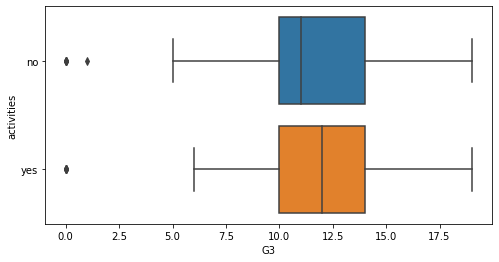

In [180]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x = 'G3', y= 'activities', data = Data, ax=ax)

In [181]:
pg.anova(data = Data, dv = 'G3', between = 'activities', detailed = True )

,Source,SS,DF,MS,F,p-unc,np2
0,activities,22.899030,1,22.899030,2.205956,0.137968,0.003414
1,Within,6685.071558,644,10.380546,NaN,NaN,NaN


A un nivel de significancia del $5$%, Se encontro que unicamente el promedio del primer corte presenta una diferencia en media en las modalidades de las actividades extracurriculares, es decir, el hecho que el estudiante tenga o no actividades extracurriculares depende de la nota del primer corte.

Las variables que son relevantes para el modelo son el colegio, el sexo, si los padren convives, educación de la madre, trabajo de la madre, razon para elegir la escuela, si tiene internet en la casa y el tiempo libre despues de la escuela y la nota del primer corte, de las cuales, para la estimación del modelo que se realizara en el siguiente apartado, se utilizaran las variable colegio, sexo, si los padren viven juntos, si tiene internet en la casa y las nota del primer corte


# Algoritmo de clasificación


- $C:$ Controla la complejidad del modelo. un valor pequeño para $C$ significa un modelo menos completo

- $penalty:$ Tipo de regularización, $l_1$ y $l_2$

In [182]:
selec = ['school', 'sex', 'Pstatus', 'internet', 'G1']

In [183]:
school_dummy = pd.get_dummies(Data['school'])
sex_dummy = pd.get_dummies(Data['sex'])
Pstatus_dummy = pd.get_dummies(Data['Pstatus'])
internet_dummy = pd.get_dummies(Data['internet'])

In [184]:
school_dummy = school_dummy.loc[:,['GP']] # 
sex_dummy = sex_dummy.loc[:,['M']] # F: categoria de referencia
Pstatus_dummy = Pstatus_dummy.loc[:,['T']] # A
internet_dummy = internet_dummy.loc[:,['yes']] # No

In [185]:
G1 = (Data['G1'] - Data['G1'].mean())/np.std(Data['G1'])

In [186]:
X = np.c_[G1, school_dummy, sex_dummy, Pstatus_dummy, internet_dummy ]

In [187]:
y = Data[['activities']]

In [188]:
y = y.replace(['yes', 'no'], [1,0])
y = np.c_[y]

## Modelo con todo el DataSet


In [189]:
param_grid = {'C':[.2, .5, .8], 'penalty':['l1', 'l2', 'none']}

In [190]:
grilla = pd.DataFrame()
C = []
penalty = []

In [191]:
for i in range(3):
  for j in range(3):
    C.append(param_grid['C'][i])
    penalty.append(param_grid['penalty'][j])

In [192]:
grilla['C'] = C
grilla['penalty'] = penalty
grilla['solver'] = ['liblinear', 'lbfgs', 'lbfgs']*3

In [193]:
grilla

,C,penalty,solver
0,0.2,l1,liblinear
1,0.2,l2,lbfgs
2,0.2,none,lbfgs
3,0.5,l1,liblinear
4,0.5,l2,lbfgs
5,0.5,none,lbfgs
6,0.8,l1,liblinear
7,0.8,l2,lbfgs
8,0.8,none,lbfgs


In [194]:
exactitud_com = []
precision_com = []

In [ ]:
for i in range(9):
  RL = LogisticRegression(C = grilla['C'][i], penalty = grilla['penalty'][i], solver = grilla['solver'][i])
  RL.fit(X,y)
  y_pred = RL.predict(X)
  exactitud_com.append((metrics.accuracy_score(y, y_pred)))
  precision_com.append((metrics.precision_score(y, y_pred)))

## Modelo con los datos de entrenamiento

In [196]:
exactitud_ent = []
precision_ent = []

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [ ]:
for i in range(9):
  RL = LogisticRegression(C = grilla['C'][i], penalty = grilla['penalty'][i], solver = grilla['solver'][i])
  RL.fit(X_train,y_train)
  y_pred = RL.predict(X_test)
  exactitud_ent.append((metrics.accuracy_score(y_test, y_pred)))
  precision_ent.append((metrics.precision_score(y_test, y_pred)))

## modelo utilizando K Fold Cross Validation

In [212]:
exactitud_kfold_5 , exactitud_kfold_10 ,precision_kfold_5, precision_kfold_10 = [] , [], [], []

In [ ]:
for i in range(9):
  RL = LogisticRegression(C = grilla['C'][i], penalty = grilla['penalty'][i], solver = grilla['solver'][i])
  RL.fit(X_train,y_train)

  cv = KFold(n_splits = 5, random_state = 17, shuffle=True)
  scores = cross_val_score(RL, X_train, y_train, scoring='precision', cv=cv, n_jobs=-1)
  scores2 = cross_val_score(RL, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
  precision_kfold_5.append(abs(np.mean(scores)))
  exactitud_kfold_5.append(abs(np.mean(scores2)))

  cv = KFold(n_splits = 10, random_state = 17, shuffle=True)
  scores = cross_val_score(RL, X_train, y_train, scoring='precision', cv=cv, n_jobs=-1)
  scores2 = cross_val_score(RL, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
 
  precision_kfold_10.append(abs(np.mean(scores)))
  exactitud_kfold_10.append(abs(np.mean(scores2)))


In [214]:
Cuadro_com = grilla.loc[:,['C', 'penalty']]

In [215]:
Cuadro_com['exactitud mod completo'] = exactitud_com 
Cuadro_com['precision mod completo'] = precision_com 
Cuadro_com['exactitud mod entrenamiento'] = exactitud_ent 
Cuadro_com['precision mod entrenamiento'] = precision_ent 
Cuadro_com['exactitud mod Kfold 5'] = exactitud_kfold_5
Cuadro_com['precision mod Kfol 5'] = precision_kfold_5 
Cuadro_com['exactitud mod Kfold 10'] = exactitud_kfold_10
Cuadro_com['precision mod Kfol 10'] = precision_kfold_10

In [216]:
Cuadro_com

,C,penalty,exactitud mod completo,precision mod completo,exactitud mod entrenamiento,precision mod entrenamiento,exactitud mod Kfold 5,precision mod Kfol 5,exactitud mod Kfold 10,precision mod Kfol 10
0,0.2,l1,0.544892,0.536082,0.507692,0.492537,0.536725,0.545976,0.525452,0.532702
1,0.2,l2,0.563467,0.554098,0.484615,0.469697,0.558159,0.563152,0.564253,0.572275
2,0.2,none,0.565015,0.555921,0.476923,0.465753,0.562061,0.564963,0.548680,0.555225
3,0.5,l1,0.558824,0.551724,0.484615,0.470588,0.536763,0.538036,0.552602,0.561573
4,0.5,l2,0.560372,0.551495,0.476923,0.465753,0.560101,0.564500,0.556486,0.566282
5,0.5,none,0.565015,0.555921,0.476923,0.465753,0.562061,0.564963,0.548680,0.555225
6,0.8,l1,0.569659,0.559486,0.476923,0.462687,0.548432,0.549513,0.552564,0.562982
7,0.8,l2,0.565015,0.555921,0.476923,0.465753,0.560101,0.564500,0.554563,0.564776
8,0.8,none,0.565015,0.555921,0.476923,0.465753,0.562061,0.564963,0.548680,0.555225


# Selección del modelo

In [217]:
Promedio_Exactitud = (Cuadro_com['exactitud mod completo'] + Cuadro_com['exactitud mod entrenamiento'] 
+ Cuadro_com['exactitud mod Kfold 5'] + Cuadro_com['exactitud mod Kfold 10'])/4

In [218]:
Promedio_precision = (Cuadro_com['precision mod completo'] + Cuadro_com['precision mod entrenamiento'] 
+ Cuadro_com['precision mod Kfol 5'] + Cuadro_com['precision mod Kfol 10'])/4

In [219]:
Final = Cuadro_com.loc[:, ['C', 'penalty']]
Final['Exactitud promedio'] = Promedio_Exactitud
Final['Precisión promedio'] = Promedio_precision

In [220]:
Final.iloc[[0,1,2,3,4,6,7]].sort_values(by = 'Exactitud promedio')

,C,penalty,Exactitud promedio,Precisión promedio
0,0.2,l1,0.528690,0.526824
3,0.5,l1,0.533201,0.530480
6,0.8,l1,0.536895,0.533667
2,0.2,none,0.538170,0.535466
4,0.5,l2,0.538470,0.537008
7,0.8,l2,0.539150,0.537738
1,0.2,l2,0.542624,0.539806


El mejor modelo según las metricas de precisión y exactitud fue el que se estimo por medio de la regularización $l_2$ con un valor de $C$ de $0.2$, el cual tiene una exactitud del $54.2624$% y una precisión de $53.9806$%, sin embargo, en comparación con el modelo que no usa ningún tipo de regularización no presenta cambios abruptos en terminos de estas metricas, ademas, este ultimo modelo es interpretable porque para su construcción no se penalizan los coeficiente, por lo tanto, es el modelo seleccionado.

## Interpretación del modelo

Con la finalidad de modelar si el estudiante tiene o no actividades extracurriculares, se utiliza como variables explicativas de un modelo de regresión logística el colegio, el sexo, si los padres viven juntos, si tiene internet en casa y el promedio del primer periodo en la nota de portugués.

In [ ]:
RL = LogisticRegression(C = 0.2)
RL.fit(X_train,y_train)

In [229]:
RL.intercept_.round(3), RL.coef_.round(3)

(array([-0.965]), array([[0.222, 0.244, 0.488, 0.445, 0.228]]))

Obteniendo el siguiente modelo:
$$log(\frac{\pi}{1-\pi})=-0.965 + 0.222x_{colegio}+
0.224x_{sexo}+ 0.448x_{estado}+ 0.445_{internet} + 0.228x_{nota}$$

Con $\pi$ como la probabilidad de que el estudiante tenga actividades curriculares.

En cuanto a la interpretación del modelo, cuando el estudiante pertenece al colegio MS, es niña, sus padres viven separados, no tiene internet y su nota en el primer periodo de portugues es cero, se estima que el logaritmo del odds es $-0.965$.

Cuando el estudiante pertece al colegio GP, se espera el logaritmo del odds aumente en 0.002 unidades en comparación a si el estudiante perteneciera al colegio MS, manteniendo constante las demas variables. Por otra parte, si el estudiante es hombre se espera que logaritmo del odd aumente en 0.224 unidades en comparación a si fuera mujer, dejando constante el resto de variables, en cuanto al estado en el se encuentran sus padres, si sus padres se encuentran juntos, el logaritmo del odd aumenta en 0.448 unidades en comparación a si sus padres estan separados, esto tambien, manteniendo las demas variables constantes. Si tiene internet en la casa, se espera que el logaritmo del odds aumente en 0.445 unidades en comparación a si no tiene internet manteniendo las demas variables constantes, por ultimo, en cuando la nota del primer corte, cuando esta aumenta en una unidad, se espera que el logaritmo del odd aumente en 0.228 unidades, esto tambien, manteniendo las demás variables constantes.


